Neste trabalho vocês devem completar o código inserindo a regressão logísitca. Depois faremos várias comparações.

as etapas do trabalho são:


1.   Criar a classe RegressaLogistica
2.   Inserir o treinamento da regressão logísitca após o treinamento da regressão linear
3.   Treinar com 100, 1000, 10000 e 60000 imagens, salvando o gidito representado pela rede e os gráficos da porcentagem de acerto. Depois você deve fazer um relatório descrevendo como foi a evolução da rede e as conclusões que você tirou a partir do que viu
4. Com 10000 imagens, alterar os alphas e também o número que multiplica os pesos iniciais aleatórios da rede, e descrever o que você pode observar (se quiser utilizar imagens para comprovar seu raciocínio, melhor ainda)







In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

def plot_digit(image):
    plt.imshow(image, cmap='gray')
    plt.show()

In [0]:
class RegressaoLinear:
    
    def __init__(self, x_treinamento, y_treinamento, x_teste, y_teste):
        
        self._x_treinamento = x_treinamento
        self._y_treinamento = y_treinamento
        self._x_teste = x_teste
        self._y_teste = y_teste
        self._m = x_treinamento.shape[1] #a matriz x_treinamento fornece nas colunas o numero de imagens utilizadas
        self._alpha = 0.01 #tamanho do passo em direção ao gradiente descendente
        
        self._W = np.random.randn(10,784)*0.01 #este numero deve ser alterado no item 4
        self._B = np.zeros((10,1))
        self._Y = np.zeros((10,m))
        
        #coloca 1 nos valores do label correto de cada imagem
        #a matriz Y vem com 10 digitos zerados, aqui a gente coloca 1 no valor correto
        for index, value in enumerate(labels):
            self._Y[value][index] = 1

    #calcula a saida(resposta) atual da rede        
    def h_teta(self, X):
        return self._W.dot(X) + self._B 

    def retorna_peso_do_digito(self, digito):
        return self._W[digito, :]


    def treinamento(self, iteracoes):

        lista_treinamento_classificados_corretamente = []
        lista_teste_classificados_corretamente = []

        for i in range(iteracoes):

            A = self.h_teta(self._x_treinamento)
            E = (A - self._Y)
            self._W = self._W - self._alpha*(np.dot(E, self._x_treinamento.T) / self._m)
            self._B = self._B - self._alpha*(np.sum(E, axis=1, keepdims=True) / self._m)

            if i%100 == 0:
                classificados_corretamente = np.sum(np.argmax(A, axis=0) == np.argmax(self._Y, axis=0))
                lista_treinamento_classificados_corretamente.append((classificados_corretamente / self._m) * 100)

                Y_hat_teste = self.h_teta(images_teste)
                teste_corretos = np.count_nonzero(np.argmax(Y_hat_teste, axis=0) == self._y_teste)
                lista_teste_classificados_corretamente.append((teste_corretos)/len(self._y_teste) * 100)

                print('Classificados corretamente treino: ', classificados_corretamente, ', teste: ', teste_corretos)

        return lista_treinamento_classificados_corretamente, lista_teste_classificados_corretamente         

In [0]:
class RegressaoLogistica:
    
    def __init__(self, x_treinamento, y_treinamento, x_teste, y_teste):
        
        self._x_treinamento = x_treinamento
        self._y_treinamento = y_treinamento
        self._x_teste = x_teste
        self._y_teste = y_teste
        self._m = x_treinamento.shape[1] #a matriz x_treinamento fornece nas colunas o numero de imagens utilizadas
        self._alpha = 0.01 #tamanho do passo em direção ao gradiente descendente
        
        self._W = np.random.randn(10,784)*0.01 #este numero deve ser alterado no item 4
        self._B = np.zeros((10,1))
        self._Y = np.zeros((10,m))
        
        #coloca 1 nos valores do label correto de cada imagem
        #a matriz Y vem com 10 digitos zerados, aqui a gente coloca 1 no valor correto
        for index, value in enumerate(labels):
            self._Y[value][index] = 1

    #calcula a saida(resposta) atual da rede        
    def h_teta(self, X):
        return self._W.dot(X) + self._B 

    def retorna_peso_do_digito(self, digito):
        return self._W[digito, :]
      
    #definindo a sigmoid 
    def sigmoid(x):
        return 1/(1 + np.exp(-x))


    def treinamento(self, iteracoes):

        lista_treinamento_classificados_corretamente = []
        lista_teste_classificados_corretamente = []

        for i in range(iteracoes):

            A = self.h_teta(self._x_treinamento)
            E = (A - self._Y)
            Z = self.h_teta(1-self.h_teta) #passa os valores da funç~ao sigmoid pra uma variavel e depois multiplica
            self._W = (self._W - self._alpha*(np.dot(E, self._x_treinamento.T) / self._m)) * Z
            self._B = (self._B - self._alpha*(np.sum(E, axis=1, keepdims=True) / self._m)) * Z
            

            if i%100 == 0:
                classificados_corretamente = np.sum(np.argmax(A, axis=0) == np.argmax(self._Y, axis=0))
                lista_treinamento_classificados_corretamente.append((classificados_corretamente / self._m) * 100)

                Y_hat_teste = self.h_teta(images_teste)
                teste_corretos = np.count_nonzero(np.argmax(Y_hat_teste, axis=0) == self._y_teste)
                lista_teste_classificados_corretamente.append((teste_corretos)/len(self._y_teste) * 100)

                print('Classificados corretamente treino: ', classificados_corretamente, ', teste: ', teste_corretos)

        return lista_treinamento_classificados_corretamente, lista_teste_classificados_corretamente 
      
     

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

m = 2000
images, labels = (x_train[0:m].reshape(m, 28*28)/255, y_train[0:m])
images = images.T

images_teste = x_test.reshape(x_test.shape[0], 28*28) / 255
images_teste = images_teste.T

lin_reg = RegressaoLinear(images, labels, images_teste, y_test)
percentage_lin_reg_train, percentage_lin_reg_test = lin_reg.treinamento(2000)

#chamar o treino da regressão logistica
#salvar também os resultados nas variáveis como a linear faz

Classificados corretamente treino:  250 , teste:  1288
Classificados corretamente treino:  1633 , teste:  7856
Classificados corretamente treino:  1683 , teste:  8100
Classificados corretamente treino:  1711 , teste:  8187
Classificados corretamente treino:  1722 , teste:  8243
Classificados corretamente treino:  1737 , teste:  8282
Classificados corretamente treino:  1747 , teste:  8312
Classificados corretamente treino:  1758 , teste:  8329
Classificados corretamente treino:  1762 , teste:  8338
Classificados corretamente treino:  1766 , teste:  8340
Classificados corretamente treino:  1769 , teste:  8352
Classificados corretamente treino:  1776 , teste:  8356
Classificados corretamente treino:  1776 , teste:  8357
Classificados corretamente treino:  1780 , teste:  8351
Classificados corretamente treino:  1782 , teste:  8348
Classificados corretamente treino:  1784 , teste:  8342
Classificados corretamente treino:  1790 , teste:  8345
Classificados corretamente treino:  1792 , teste:

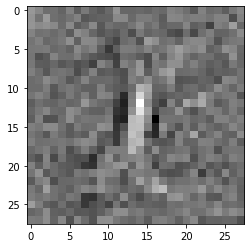

In [0]:
plot_digit(lin_reg.retorna_peso_do_digito(1).reshape(28,28))
#fique a vontade para alterar o dígito que deseja visualizar na tela

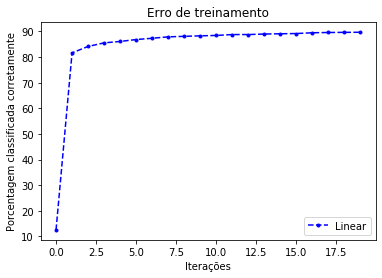

In [0]:
plt.xlabel('Iterações')
plt.ylabel('Porcentagem classificada corretamente')
plt.title('Erro de treinamento')
plt.plot(percentage_lin_reg_train, 'b--.', label='Linear')
#plt.plot(percentage_log_reg_train, 'r-', label='Logistico') descomentar quando a regressão logísitca estiver pronta
plt.legend(loc='best')

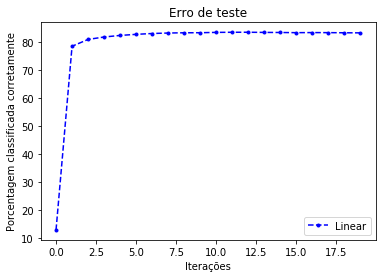

In [0]:
plt.xlabel('Iterações')
plt.ylabel('Porcentagem classificada corretamente')
plt.title('Erro de teste')
plt.plot(percentage_lin_reg_test, 'b--.', label='Linear')
#plt.plot(percentage_log_reg_test, 'r-', label='Logistico') descomentar quando a regressão logísitca estiver pronta
plt.legend(loc='best')


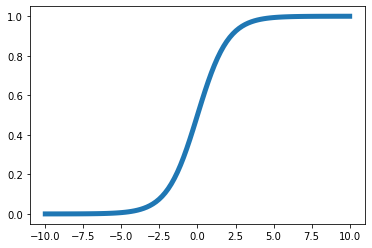

In [0]:
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))
plt.plot(np.linspace(-10,10,100), sigmoid(np.linspace(-10,10,100)), lw=5)
plt.show()